<a href="https://colab.research.google.com/github/kunal266/Algo_Practice/blob/main/time_series_analysis/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/UDEMY_TSA_FINAL/Data/Alcohol_Sales.csv',index_col = 'DATE',parse_dates=True)

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
df.columns=['Sales']

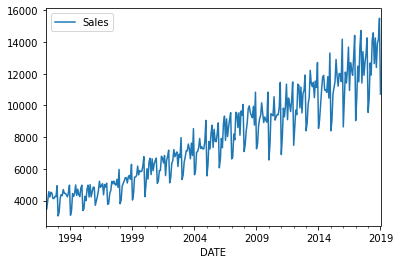

In [5]:
df.plot()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
results = seasonal_decompose(df['Sales'])

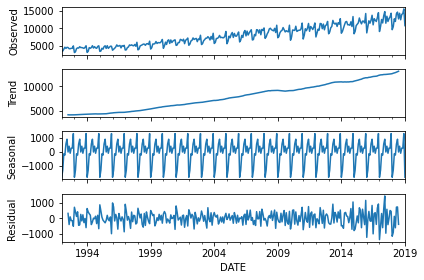

In [8]:
results.plot();

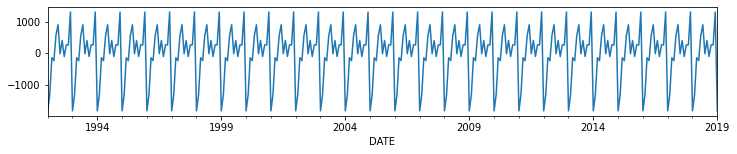

In [9]:
ax = results.seasonal.plot(figsize=(12,2));

In [10]:
train  = df.iloc[:313]
test = df.iloc[313:]

In [11]:
len(test)

12

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(train) #finds the max value in train data

MinMaxScaler()

In [15]:
scaled_train = scaler.transform(train)

In [16]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [17]:
scaled_test = scaler.transform(test)

In [18]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
scaled_test # if test data has a value greater than max value in train then it will be like >1

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

In [20]:
n_input= 2
n_features = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [21]:
len(scaled_train)

313

In [22]:
len(generator)

311

In [23]:
X,y=  generator[0]

In [24]:
X

array([[[0.03658432],
        [0.03649885]]])

In [25]:
y

array([[0.08299855]])

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [27]:
n_input= 12
n_features = 1

train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [28]:
model = Sequential()
model.add(LSTM(160,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 160)               103680    
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(train_generator,epochs=25)

Epoch 1/25
301/301 [==============================] - 5s 9ms/step - loss: 0.0132
Epoch 2/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0090
Epoch 3/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0086
Epoch 4/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0076
Epoch 5/25
301/301 [==============================] - 3s 11ms/step - loss: 0.0059
Epoch 6/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0048
Epoch 7/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0044
Epoch 8/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0028
Epoch 9/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0027
Epoch 10/25
301/301 [==============================] - 3s 10ms/step - loss: 0.0025
Epoch 11/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0024
Epoch 12/25
301/301 [==============================] - 3s 9ms/step - loss: 0.0020
Epoch 13/25
301/301 [==

In [31]:
model.history.history.keys()

dict_keys(['loss'])

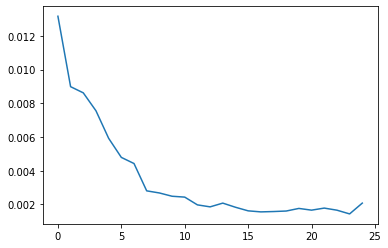

In [32]:
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

In [33]:
# 12 history step --> step 13
# last 12 points train --> pt 1 of test data

In [34]:
first_eval_batch = scaled_train[-12:]

In [35]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [36]:
first_eval_batch=first_eval_batch.reshape((1,n_input,n_features))

In [37]:
model.predict(first_eval_batch)

array([[0.6902191]], dtype=float32)

## Forecast using RNN model

In [38]:
# hold my prediction
test_prediction=[]

# last n input points from the training set
first_eval_batch = scaled_train[-n_input:]
#reshape this to the format RNN wants (same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [40]:
test_prediction

[array([0.6902191], dtype=float32),
 array([0.82453996], dtype=float32),
 array([0.7673337], dtype=float32),
 array([0.94122064], dtype=float32),
 array([1.0135962], dtype=float32),
 array([0.75486505], dtype=float32),
 array([0.91325015], dtype=float32),
 array([0.78344065], dtype=float32),
 array([0.8620186], dtype=float32),
 array([0.905422], dtype=float32),
 array([0.9768645], dtype=float32),
 array([0.59901977], dtype=float32)]

In [41]:
true_predictions = scaler.inverse_transform(test_prediction)

In [43]:
true_predictions

array([[11105.87330109],
       [12677.29298538],
       [12008.03679663],
       [14042.34028065],
       [14889.06167591],
       [11862.16622365],
       [13715.11348492],
       [12196.47215861],
       [13115.75542831],
       [13623.53165364],
       [14459.33798128],
       [10038.93224072]])

In [46]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11105.873301
2018-03-01,12683,12677.292985
2018-04-01,11919,12008.036797
2018-05-01,14138,14042.340281
2018-06-01,14583,14889.061676
2018-07-01,12640,11862.166224
2018-08-01,14257,13715.113485
2018-09-01,12396,12196.472159
2018-10-01,13914,13115.755428


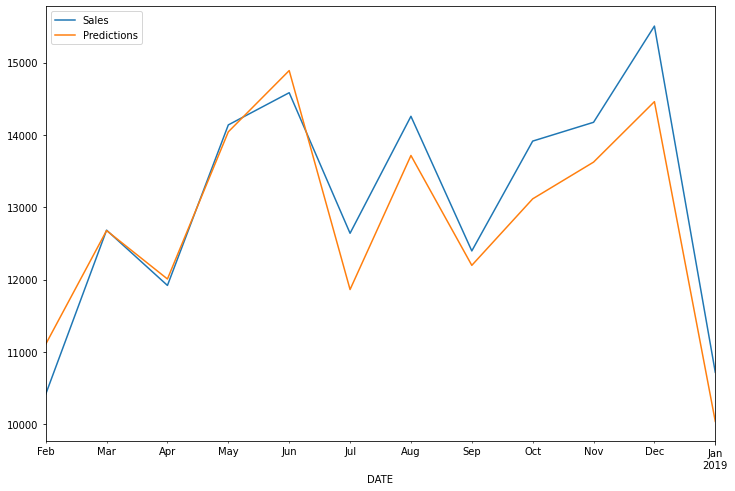

In [48]:
test.plot(figsize=(12,8))

In [49]:
model.save('mycoolmodel.h5')

In [51]:
from keras.models import load_model
new_model = load_model('mycoolmodel.h5')

In [53]:
new_model = load_model('mycoolmodel.h5')

In [54]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 160)               103680    
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_________________________________________________________________
